In [1]:
import numpy as np
import numpy.random as npr
import cvxpy as cp
import time
import matplotlib.pyplot as plt

from formulations_flipped import *
from utils import *
from greedy_20q import *

import os
import imageio

In [9]:
def plot_stuff(Data_mat = None, Data_mat_lp = None, Data_mat_greedy = None):
    if type(Data_mat) == np.ndarray: plt.plot(np.mean(Data_mat, axis=0),'o-', label="True Val")
    if type(Data_mat_lp) == np.ndarray: plt.plot(np.mean(Data_mat_lp, axis=0),'o',label="LP Val")
    if type(Data_mat_greedy) == np.ndarray: plt.plot(np.mean(Data_mat_greedy, axis=0), 'x-', label="Greedy Val")
    plt.xlabel("k")
    plt.ylabel("$1^T y$")
    plt.title("Random Mat MISP flipped (m = {}, n = {}, trials = {})".format(m,n,trials))
    plt.legend()

## Experiments for 20 Question Flipped Individual

In [2]:
m = 30
n = 8
trials = 1
Data_mat = np.zeros((trials, n))
Data_mat_lp = np.zeros((trials, n))
Data_mat_sdp = np.zeros((trials, n))

Data_col = np.zeros((trials, n))
Data_col_lp = np.zeros((trials, n))
Data_col_sdp = np.zeros((trials, n))

x_true_mat = np.zeros((n,n))
x_lp_mat = np.zeros((n,n))

y_true_mat = np.zeros((n, m))

npr.seed(0)
K_mat = rand_01_mat(m,n)
w = np.ones(n)
for k in range(n):
    print("%.2f" %((k+1)/n), end = "\r")
    for trial in range(trials):
        # K_mat = rand_01_mat(m,n)

        # K_col = rand_01_col_mat(m,n)
        # w = npr.randint(1,5,n)
        Data_mat[trial,k], x_true_mat[k,:], _ = misp_flip(K_mat,w,k + 1)
        Data_mat_lp[trial,k], x_lp_mat[k,:], _ = misp_lp_flip(K_mat,w,k+1)
        Data_mat_sdp[trial,k], _  = misp_sdp_flip(K_mat,w,k+1)

        # Data_col[trial,r], _, _ = misp(K_col,w,r)
        # Data_col_lp[trial,r], _, _ = misp_lp(K_col,w,r)
        # Data_col_sdp[trial,r], _ = misp_sdp(K_col,w,r)

        #### GROUP ####
        # Data_mat[trial,r], x_true_mat[r,:] = misp_grp(K_mat,w,r)
        # Data_mat_lp[trial,r], x_lp_mat[r,:] = misp_grp_lp(K_mat,w,r)



## Compare Values for normal matrix

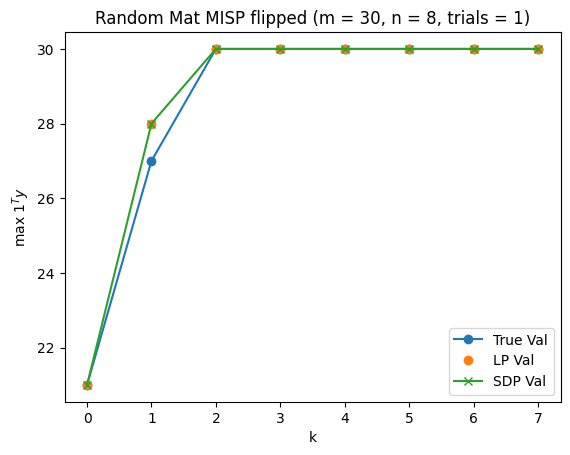

In [3]:
plt.plot(np.mean(Data_mat, axis=0),'o-', label="True Val")
plt.plot(np.mean(Data_mat_lp, axis=0),'o',label="LP Val")
plt.plot(np.mean(Data_mat_sdp, axis=0), 'x-', label="SDP Val")
plt.xlabel("k")
plt.ylabel("max $1^T y$")
plt.title("Random Mat MISP flipped (m = {}, n = {}, trials = {})".format(m,n,trials))
plt.legend()

In [ ]:
Data_mat_lp

In [ ]:
m, n = 5, 4
np.where(npr.rand(m,n) < 0.5, np.ones((5,4)), np.zeros((5,4)))


## 20 Questions Group Flipped tests

In [24]:
def run_experiment_flipped(D_mat = None, m = 20, n = 5, trials = 1, seed = 0):

    npr.seed(seed)

    if D_mat is None:
        D_mat = rand_01_mat(m,n)
    else:
        m,n = D_mat.shape
        
    Data_mat = np.zeros((trials, n))
    Data_mat_lp = np.zeros((trials, n))
    Data_mat_greedy = np.zeros((trials, n))

    x_true_mat = np.zeros((n,n))
    x_lp_mat = np.zeros((n,n))
    x_greedy_mat = np.zeros((n,n))

    
    w = np.ones(n)
    for k in range(n):
        print("%.2f" %((k+1)/n), end = "\r")
        for trial in range(trials):
            # K_mat = rand_01_mat(m,n)

            # K_col = rand_01_col_mat(m,n)
            # w = npr.randint(1,5,n)
            Data_mat[trial,k], x_true_mat[k,:] = misp_flip_group(D_mat,w,k + 1)
            Data_mat_lp[trial,k], x_lp_mat[k,:] = misp_flip_group_lp(D_mat,w,k+1)
            x_greedy_mat, Data_mat_greedy[trial,k] = greedy_select(D_mat,k+1)

    return Data_mat, Data_mat_lp, Data_mat_greedy



In [26]:
Data_mat, Data_mat_lp, Data_mat_greedy = run_experiment_flipped()

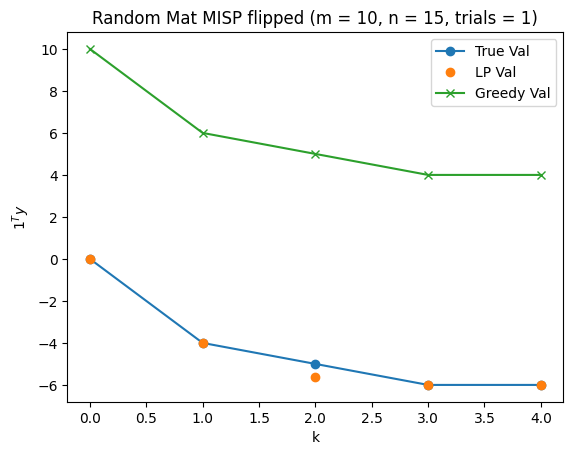

In [27]:
plot_stuff(m - Data_mat, m - Data_mat_lp, Data_mat_greedy)

## Try worst case greedy

In [28]:
D = np.zeros((12,5))
D[:,0] = np.concatenate((np.ones(6),np.zeros(6)))
D[0,1] = 1
D[6,1] = 1
D[1,2] = 1
D[7,2] = 1
D[:,3] = np.concatenate((np.ones(3),np.zeros(9)))
D[:,4] = np.concatenate((np.zeros(6),np.ones(3),np.zeros(3)))

Data_mat, Data_mat_lp, Data_mat_greedy = run_experiment_flipped(D_mat=D)

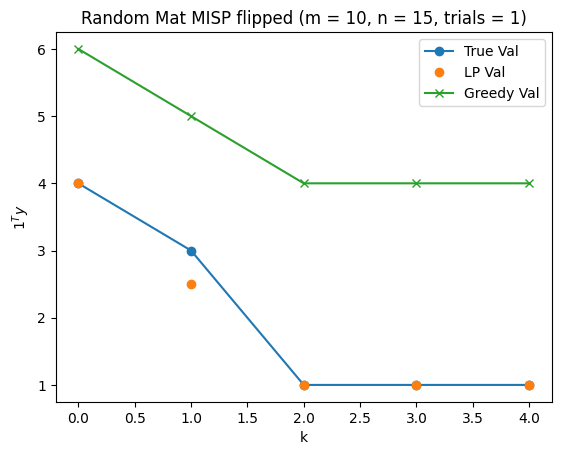

In [29]:
plot_stuff(m - Data_mat, m - Data_mat_lp, Data_mat_greedy)